## CartPole Skating

> **Masalah**: Jika Peter ingin melarikan diri dari serigala, dia harus bisa bergerak lebih cepat darinya. Kita akan melihat bagaimana Peter dapat belajar bermain skating, khususnya untuk menjaga keseimbangan, menggunakan Q-Learning.

Pertama, mari kita instal gym dan impor pustaka yang diperlukan:


In [1]:
#code block 1

## Membuat lingkungan cartpole


In [ ]:
#code block 2

Untuk melihat bagaimana lingkungan bekerja, mari jalankan simulasi singkat selama 100 langkah.


In [ ]:
#code block 3

Selama simulasi, kita perlu mendapatkan observasi untuk memutuskan bagaimana bertindak. Faktanya, fungsi `step` mengembalikan observasi saat ini, fungsi reward, dan flag `done` yang menunjukkan apakah masuk akal untuk melanjutkan simulasi atau tidak:


In [ ]:
#code block 4

Kita dapat memperoleh nilai minimum dan maksimum dari angka-angka tersebut:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Mari kita juga mengeksplorasi metode diskretisasi lain menggunakan bin:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Mari kita jalankan simulasi singkat dan amati nilai lingkungan diskret tersebut.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


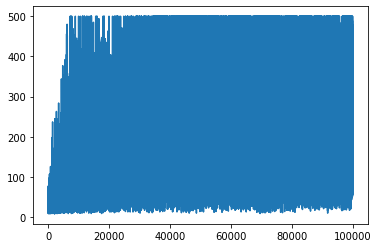

In [20]:
plt.plot(rewards)

Dari grafik ini, tidak mungkin untuk mengetahui apa pun, karena sifat dari proses pelatihan stokastik menyebabkan panjang sesi pelatihan sangat bervariasi. Untuk membuat grafik ini lebih bermakna, kita dapat menghitung **rata-rata berjalan** dari serangkaian eksperimen, misalnya 100. Ini dapat dilakukan dengan mudah menggunakan `np.convolve`:


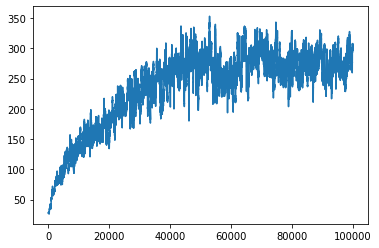

In [22]:
#code block 12

## Mengubah Hyperparameter dan Melihat Hasilnya

Sekarang akan menarik untuk melihat bagaimana model yang telah dilatih berperilaku. Mari kita jalankan simulasi, dan kita akan mengikuti strategi pemilihan aksi yang sama seperti saat pelatihan: sampling berdasarkan distribusi probabilitas dalam Q-Table:


In [23]:
# code block 13

## Menyimpan hasil ke dalam GIF animasi

Jika Anda ingin mengesankan teman-teman Anda, Anda mungkin ingin mengirimkan gambar GIF animasi dari tiang penyeimbang. Untuk melakukan ini, kita dapat memanggil `env.render` untuk menghasilkan bingkai gambar, lalu menyimpannya sebagai GIF animasi menggunakan pustaka PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan penerjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berupaya untuk memberikan hasil yang akurat, harap diperhatikan bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang berwenang. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa penerjemahan manusia profesional. Kami tidak bertanggung jawab atas kesalahpahaman atau penafsiran yang keliru yang timbul dari penggunaan terjemahan ini.
